

# Setting up the data of AAC descriptor extracted using iLearnPlus

In [36]:
import pandas as pd
pos=pd.read_csv("/content/ShortPosAAC.csv",header=None)
neg=pd.read_csv("/content/ShortNegAAC.csv",header=None)
pos.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0.142857,0.000000,0.000,0.000,0.142857,0.142857,0.0,0.000000,0.142857,...,0.0,0.000,0.142857,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.285714
1,0,0.285714,0.285714,0.000,0.000,0.000000,0.142857,0.0,0.000000,0.000000,...,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.142857
2,0,0.000000,0.000000,0.125,0.125,0.125000,0.000000,0.0,0.000000,0.000000,...,0.0,0.125,0.000000,0.125000,0.000000,0.0,0.125000,0.125000,0.000000,0.000000
3,0,0.000000,0.000000,0.000,0.000,0.111111,0.000000,0.0,0.000000,0.000000,...,0.0,0.000,0.111111,0.111111,0.111111,0.0,0.111111,0.222222,0.111111,0.111111
4,0,0.142857,0.000000,0.000,0.000,0.000000,0.142857,0.0,0.142857,0.142857,...,0.0,0.000,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.142857,0.000000


In [37]:
print(pos.shape)
print(neg.shape)



(5695, 21)
(2737, 21)


In [38]:
#merging data of AAC descriptor
df=pd.concat([pos.head(2737),neg])
df.head()
#print(df1.shape)
#print(df1.shape)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0.142857,0.000000,0.000,0.000,0.142857,0.142857,0.0,0.000000,0.142857,...,0.0,0.000,0.142857,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.285714
1,0,0.285714,0.285714,0.000,0.000,0.000000,0.142857,0.0,0.000000,0.000000,...,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.142857
2,0,0.000000,0.000000,0.125,0.125,0.125000,0.000000,0.0,0.000000,0.000000,...,0.0,0.125,0.000000,0.125000,0.000000,0.0,0.125000,0.125000,0.000000,0.000000
3,0,0.000000,0.000000,0.000,0.000,0.111111,0.000000,0.0,0.000000,0.000000,...,0.0,0.000,0.111111,0.111111,0.111111,0.0,0.111111,0.222222,0.111111,0.111111
4,0,0.142857,0.000000,0.000,0.000,0.000000,0.142857,0.0,0.142857,0.142857,...,0.0,0.000,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.142857,0.000000


In [39]:
df = df.drop(df.columns[(df == 0).all()], axis=1)


In [40]:
df.shape

(5474, 20)

# Applying Kmean on AAC component only

In [41]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)
X=shuffled_df

In [42]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

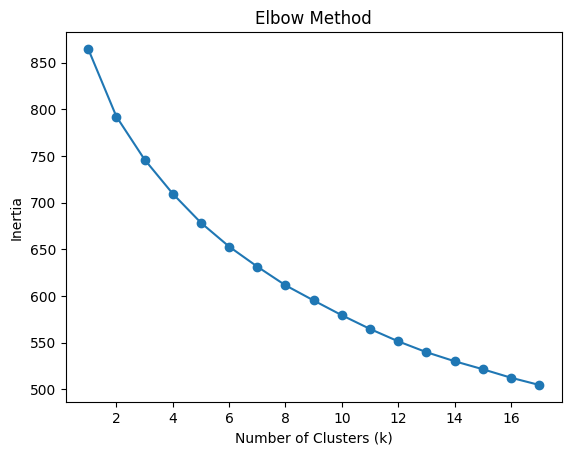

In [43]:
from sklearn.cluster import KMeans

# Perform K-means clustering for different values of k
k_values = range(1, 18)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [44]:
from sklearn.cluster import KMeans

k=2
kmeans=KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(pos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
y_pred is kmeans.labels_

True

In [46]:
kmeans.cluster_centers_

array([[0.        , 0.06441557, 0.03240016, 0.03849031, 0.03914902,
        0.07044276, 0.08163108, 0.02617173, 0.03750941, 0.04253695,
        0.09627822, 0.02388416, 0.03911046, 0.08937976, 0.03753265,
        0.04644781, 0.06574582, 0.04116489, 0.05276703, 0.02994241,
        0.04499978],
       [0.        , 0.03881387, 0.05648816, 0.01352915, 0.01615177,
        0.03639712, 0.02939151, 0.02195199, 0.0433324 , 0.11189965,
        0.0685826 , 0.00986437, 0.01265451, 0.0232486 , 0.01926415,
        0.26896536, 0.02266764, 0.02473659, 0.03021073, 0.1322345 ,
        0.01961536]])

In [47]:
kmeans.inertia_

854.7959217403745

In [48]:
from sklearn.metrics import silhouette_score

In [49]:
# Fit the model to the data and get the cluster assignments
labels = kmeans.fit_predict(shuffled_df)

# Ensure that X has the same number of samples as labels
X = shuffled_df

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.1615579904248115


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


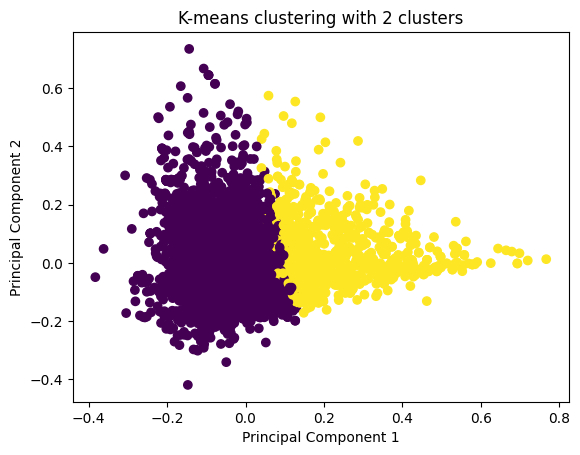

In [50]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Create a K-means clustering model with 2 clusters, using K-means++ initialization
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(pos)

# Perform PCA dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(pos)

# Create a scatter plot of the reduced data, colored by cluster assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title("K-means clustering with 2 clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [51]:
# Count the number of samples in each cluster
import numpy as np
counts = np.bincount(y_pred)

print(f"Number of samples in cluster 0: {counts[0]}")
print(f"Number of samples in cluster 1: {counts[1]}")

Number of samples in cluster 0: 4764
Number of samples in cluster 1: 931


# Applying DBSCAN

In [52]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [53]:
# Method 3: Silhouette Score
from sklearn.metrics import silhouette_score

best_eps = None
best_min_samples = None
best_score = -1

for eps in np.linspace(0.1, 1.0, num=10):
    for min_samples in range(2, 6):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labels = dbscan.labels_
        if len(np.unique(labels)) > 1:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

In [54]:
print(f"best_eps :{best_eps}")
print(f"best_min_samples :{best_min_samples}")


best_eps :0.4
best_min_samples :4


In [55]:
dbscan=DBSCAN(eps=0.3,min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.3, min_samples=2)

In [56]:
# Evaluate using Silhouette Score
labels = dbscan.labels_
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.07563094705521255


# Applying Agglomerative Clustering

In [57]:
# Apply Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering


agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X)

# Evaluate using Silhouette Score
labels = agg_clustering.labels_
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.05720821529993045


# GMM

In [58]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, n_init=10)
gm.fit(X)

GaussianMixture(n_components=2, n_init=10)

In [59]:
gm.weights_

array([0.59316809, 0.40683191])

In [60]:
gm.means_

array([[0.05718565, 0.02648575, 0.03774218, 0.03150809, 0.07382189,
        0.07362978, 0.02385449, 0.03474269, 0.03958109, 0.07802675,
        0.03722762, 0.07014272, 0.0657683 , 0.03666009, 0.06324838,
        0.0995838 , 0.04363088, 0.03894817, 0.03115536, 0.03705632],
       [0.06442343, 0.02593067, 0.03839511, 0.03889638, 0.06257203,
        0.06625304, 0.03185421, 0.05190521, 0.09205803, 0.10632995,
        0.        , 0.        , 0.07124056, 0.0379313 , 0.12107562,
        0.        , 0.04112086, 0.04996614, 0.06730143, 0.032746  ]])

In [61]:
gm.covariances_

array([[[ 8.03140383e-03, -3.69878854e-04, -1.41212964e-04,
         -2.84817455e-04, -1.15730250e-03, -4.07356511e-04,
          1.09001687e-04, -4.88648299e-04, -4.72374550e-04,
         -7.95797167e-04, -1.11224906e-04, -5.56425373e-04,
         -1.05222531e-03, -4.37700804e-04, -7.05168901e-04,
         -7.78887409e-05, -4.06886202e-04, -2.30510922e-05,
         -1.21224821e-04, -5.30221067e-04],
        [-3.69878854e-04,  4.73744079e-03, -4.98256064e-04,
         -3.24659543e-04, -8.92503947e-04, -6.49786495e-04,
          2.44752485e-04, -4.00430935e-05, -1.48335171e-04,
         -6.66707069e-04, -3.15994984e-04,  7.67508077e-05,
         -1.13192942e-06, -1.36572223e-04, -3.52730192e-04,
         -4.25428884e-04,  4.88306057e-04, -3.06214514e-04,
         -3.28051372e-04, -8.99558056e-05],
        [-1.41212964e-04, -4.98256064e-04,  4.78490955e-03,
          1.17496315e-05, -2.94907284e-05, -6.83391243e-04,
         -1.23150865e-04,  1.72420031e-05, -1.53835392e-04,
         -3.

In [62]:
gm.converged_

True

In [63]:
gm.n_iter_

14

Silhouette Score: 0.06127575738151311


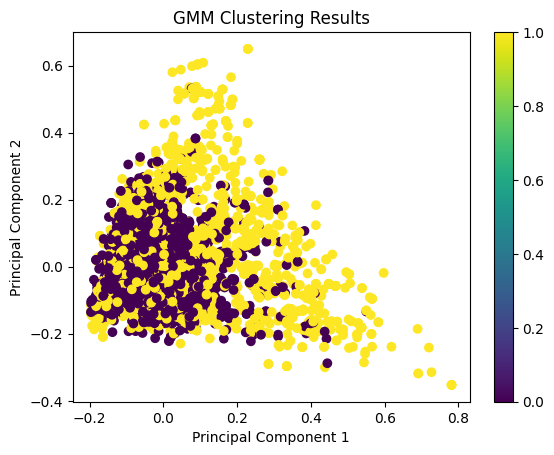

In [65]:
predicted_labels = gm.predict(X)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, predicted_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clustering results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis')
plt.title("GMM Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()